### Goal
 prediction models that predict taxi trip demand using support vector machines in spatio-temporal resolution (i.e., spatial-unit and time buckets). Your method should predict for each spatial unit (hexagon and census tract) and time-basket (e.g., 08am-11.59am) the taxi demand. Also adevise a reasonable validation strategy for your prediction model (i.e., definition of test, training data etc).

Approach for SVM:
- Simply start without a kernel. Then, gradually make your model complex by integrating different
kind of kernels. Also, use grid search to find optimal values for your hyperparameters.
- How good is your model? Evaluate your model’s performance and comment on its shortfalls.
- Show how you model’s performance varies as you increase or decrease temporal resolution for the
following period length: 1h, 2h, 6h, 24h. Also, vary the length of the hexagon edges. How does your
performance change when you only use census tract as spatial units?
- How could the model be improved further? Explain some of the improvement levers that you might
focus on in a follow-up project.


## 00 - Test on Synthetic Data

In [117]:
import numpy as np
from sklearn.svm import SVR

# Example dataset
time_bucket = np.array([0, 4, 8, 12, 16])  # Input variable 1: Time bucket
spatial_unit = np.array([1, 2, 3, 2, 1])  # Input variable 2: Spatial unit
taxi_demand = np.array([100, 130, 150, 250, 190])  # Target variable: Taxi demand

# Reshape the input variables
time_bucket = time_bucket.reshape(-1, 1)
spatial_unit = spatial_unit.reshape(-1, 1)

# Concatenate the input variables
X = np.concatenate((time_bucket, spatial_unit), axis=1)

# Create and train the SVR model without a kernel
svr = SVR(kernel='linear')
svr.fit(X, taxi_demand)

# Predicting on new data
new_time_bucket = np.array([4, 12, 16])  # New time bucket values
new_spatial_unit = np.array([3, 1, 2])  # New spatial unit values
new_X = np.concatenate((new_time_bucket.reshape(-1, 1), new_spatial_unit.reshape(-1, 1)), axis=1)
predictions = svr.predict(new_X)

print("Predicted taxi demand:", predictions)


Predicted taxi demand: [129.39411765 169.39411765 190.80588235]


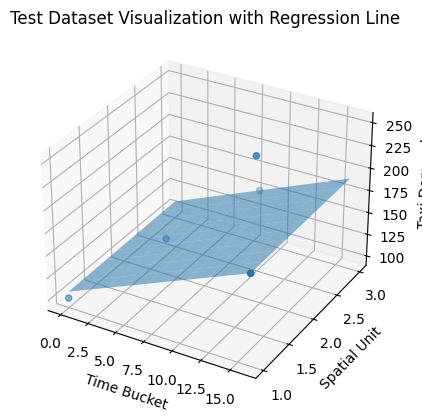

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of time_bucket and spatial_unit values
time_bucket_mesh, spatial_unit_mesh = np.meshgrid(
    np.linspace(time_bucket.min(), time_bucket.max(), 10),
    np.linspace(spatial_unit.min(), spatial_unit.max(), 10)
)

# Flatten the meshgrid points and make predictions
X_mesh = np.column_stack((time_bucket_mesh.flatten(), spatial_unit_mesh.flatten()))
predictions = svr.predict(X_mesh)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the dataset
ax.scatter(time_bucket, spatial_unit, taxi_demand)

# Plot the regression surface
ax.plot_surface(time_bucket_mesh, spatial_unit_mesh, predictions.reshape(time_bucket_mesh.shape), alpha=0.5)

# Set labels and title
ax.set_xlabel('Time Bucket')
ax.set_ylabel('Spatial Unit')
ax.set_zlabel('Taxi Demand')
ax.set_title('Test Dataset Visualization with Regression Line')

# Show the plot
plt.show()


### test on small sample

In [37]:
from sklearn.preprocessing import LabelEncoder

sample = sdf[['demand', 'start_4_hour', 'pickup_hex_7']]

label_encoder = LabelEncoder()

# Fit the label encoder on the categorical column
label_encoder.fit(sample['pickup_hex_7'])

# Transform the categorical values into integers
sample['hex'] = label_encoder.transform(sample['pickup_hex_7'])

sample = sample.drop(['pickup_hex_7'], axis=1)

C:\Users\Tobi\AppData\Local\Temp\ipykernel_5980\439067756.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['hex'] = label_encoder.transform(sample['pickup_hex_7'])


In [38]:
sample['hex'].unique()

array([ 44,  24,  21,  18,  26, 117,  22,  23,  50,  54,  51,  64,  47,
       101, 104,  96,  20,   4,  39, 114,  25, 118, 102,  40,  19, 106,
       110,  72,  45, 100, 108,   3,  52,  27,  43,  58,  88,  36,  48,
        91,  56,  53,  37,  42,  62,  46,  89,  77, 103,  87,  94,  10,
        59,  97, 107,  14,  93, 105,  69,  76,  83,   8,  28,  73, 119,
        92,  80,  95,  75,  71, 121,  70,  81,  74,   6,  79, 115,  61,
         1,   9,  66,  49,  16,  99,   0,   2,  41,  98,  30,  82, 111,
        12, 109,  11,  67,  63, 113,  57,  34,  60,  33,  35, 112,  78,
        31,  32,  65,  38,  85,  29,  90,  68, 116,  84,  86,  55, 120,
        15,   7,  17,   5,  13])

<Axes: xlabel='hex', ylabel='demand'>

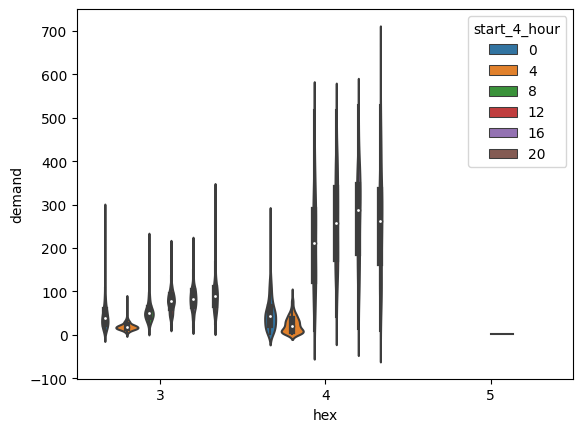

In [59]:
df = sample[sample.hex.isin([3,4,5])]

import seaborn as sns

sns.violinplot(data=df, x='hex', y='demand', hue='start_4_hour')

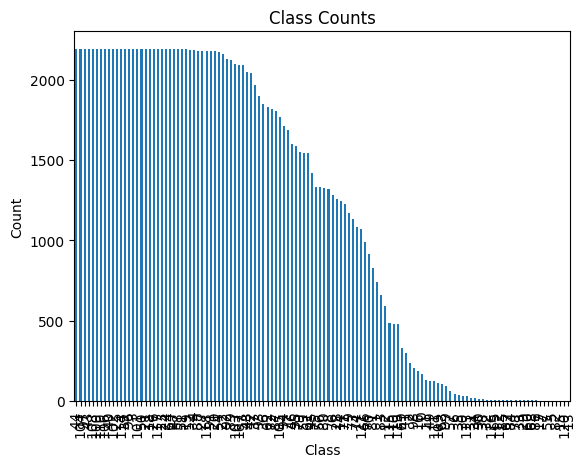

In [64]:
df = sample['hex'].value_counts()

df.plot(kind='bar')

# Set the plot labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')

# Display the plot
plt.show()

TODO: Nur volle time buckets predicten mit == 2190 einträgen 
TODO: Resolution auf 6, selben plot  --> geht nicht weil keine resolution 6 vorhanden 

In [8]:
df['lat'] = df['pickup_hex_7'].apply(lambda x: h3.h3_to_geo(x)[0])
df['long'] = df['pickup_hex_7'].apply(lambda x: h3.h3_to_geo(x)[1])

type: invalid literal for int() with base 16: 'None'

In [98]:
from h3 import h3
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#  encode labels 
label_encoder = LabelEncoder()
label_encoder.fit(sdf['pickup_hex_7'])

sdf['hex'] = label_encoder.transform(sdf['pickup_hex_7'])


# only hexagons that have observations in each time bucket 
counts = sdf['hex'].value_counts()
df = sdf[sdf['hex'].isin(counts[counts == 2190].index)]

#transform hex to numerical
df['lat'] = df['pickup_hex_7'].apply(lambda x: h3.h3_to_geo(x)[0])
df['long'] = df['pickup_hex_7'].apply(lambda x: h3.h3_to_geo(x)[1])

sdf = sdf.drop(['start_4_hour', 'start_weekday', 'pickup_hex_7'], axis=1)

# split x,y 
X = sdf.drop(['demand'], axis=1)
y = sdf['demand']

#scale features 
scaler = StandardScaler()

# Fit the scaler on the features and transform the data
X = scaler.fit_transform(X)

In [6]:
# split data 
sdf

,demand,start_weekday_sin,start_weekday_cos,start_weekday,start_4_hour_sin,start_4_hour_cos,start_4_hour,pickup_hex_7
0,71,0.433884,-0.900969,3,0.000000e+00,1.0,0,872664ca5ffffff
1,1833,-0.781831,0.623490,6,-4.898587e-16,1.0,12,872664c1affffff
2,1466,-0.433884,-0.900969,4,8.660254e-01,-0.5,20,872664c13ffffff
3,185,0.000000,1.000000,0,-8.660254e-01,-0.5,16,872664c10ffffff
4,9330,0.433884,-0.900969,3,8.660254e-01,-0.5,20,872664c1effffff
...,...,...,...,...,...,...,...,...
148887,1,0.433884,-0.900969,3,0.000000e+00,1.0,0,872664cd0ffffff
148888,1,-0.433884,-0.900969,4,-8.660254e-01,-0.5,16,872664cd4ffffff
148889,1,0.000000,1.000000,0,-8.660254e-01,-0.5,16,872664ccdffffff
148890,2,0.781831,0.623490,1,8.660254e-01,-0.5,20,872664cd4ffffff


## 01 - Data Preparation

In [1]:
# Imports
import vaex
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
timeB = 4
resolution = 7
hdf = vaex.open("data/trips/trips_grouped_" + str(timeB) + "h_r" + str(resolution) + ".hdf5")
df = hdf.to_pandas_df()

In [3]:
df.columns

Index(['start_day', 'start_month', 'start_weekday', 'start_weekday_sin',
       'start_weekday_cos', 'ts_start_4_hour', 'start_4_hour',
       'start_4_hour_sin', 'start_4_hour_cos', 'pickup_hex_7', 'demand',
       'Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Company_encoded', 'Taxi ID_encoded',
       'Payment Type_Dispute', 'Payment Type_Unknown', 'Payment Type_Prcard',
       'Payment Type_Cash', 'Payment Type_Credit Card', 'Payment Type_Pcard',
       'Payment Type_No Charge'],
      dtype='object')

In [4]:
# Independent variables columns
iVars = ["start_weekday_sin", "start_weekday_cos", "start_weekday", "start_4_hour_sin",  "start_4_hour_cos", "start_4_hour", "pickup_hex_7"]

# All interesting columns
iColumns = ["demand"] + iVars

# Select interesting columns
sdf = df[iColumns]

In [5]:
sdf

,demand,start_weekday_sin,start_weekday_cos,start_weekday,start_4_hour_sin,start_4_hour_cos,start_4_hour,pickup_hex_7
0,71,0.433884,-0.900969,3,0.000000e+00,1.0,0,872664ca5ffffff
1,1833,-0.781831,0.623490,6,-4.898587e-16,1.0,12,872664c1affffff
2,1466,-0.433884,-0.900969,4,8.660254e-01,-0.5,20,872664c13ffffff
3,185,0.000000,1.000000,0,-8.660254e-01,-0.5,16,872664c10ffffff
4,9330,0.433884,-0.900969,3,8.660254e-01,-0.5,20,872664c1effffff
...,...,...,...,...,...,...,...,...
148887,1,0.433884,-0.900969,3,0.000000e+00,1.0,0,872664cd0ffffff
148888,1,-0.433884,-0.900969,4,-8.660254e-01,-0.5,16,872664cd4ffffff
148889,1,0.000000,1.000000,0,-8.660254e-01,-0.5,16,872664ccdffffff
148890,2,0.781831,0.623490,1,8.660254e-01,-0.5,20,872664cd4ffffff


In [10]:
X = X.drop(["pickup_hex_7", "start_weekday", "start_4_hour"], axis=1)

In [87]:
# Removing Rides without a Hexagon/ Start-Location
sdf = sdf[(sdf["pickup_hex_7"].notna()) & (sdf["pickup_hex_7"] != "None")]


### feature scaling

In [7]:
# Divide into X and y
data = sdf
X = data[iVars]
y = data["demand"]

In [55]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

# Fit the scaler on the features and transform the data
X_scaled = scaler.fit_transform(X)



In [56]:
X_scaled

array([[ 0.61202055, -1.26485224, -0.0101724 ,  1.43133226],
       [-1.10687484,  0.89164451, -0.0101724 ,  1.43133226],
       [-0.61491277, -1.26485224,  1.20977249, -0.6986498 ],
       ...,
       [-0.00144611,  1.42425522, -1.23011729, -0.6986498 ],
       [ 1.10398261,  0.89164451,  1.20977249, -0.6986498 ],
       [ 1.10398261,  0.89164451, -0.0101724 ,  1.43133226]])

## 02 - Model Creation

Basic Model mit weekday und 4_hour

In [75]:
#create train test validation set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle= True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle = True)

In [59]:
# Print shape
print('X shape:', X_scaled.shape)
print('y shape:', y.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X shape: (144512, 4)
y shape: (144512,)
X_val shape: (23122, 4)
y_val shape: (23122,)


In [97]:
from sklearn.svm import SVR

# fit svr to data
svr = SVR(kernel='rbf', epsilon=0.003, gamma=1e-4)
svr.fit(X_train, y_train)

SVR(C=1, gamma=0.0001)

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = svr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 782465.1133745688
Mean Absolute Error: 223.47538634190414
R-squared: -0.06251641512436112


In [101]:
np.max(y_pred)

13.35540595331568

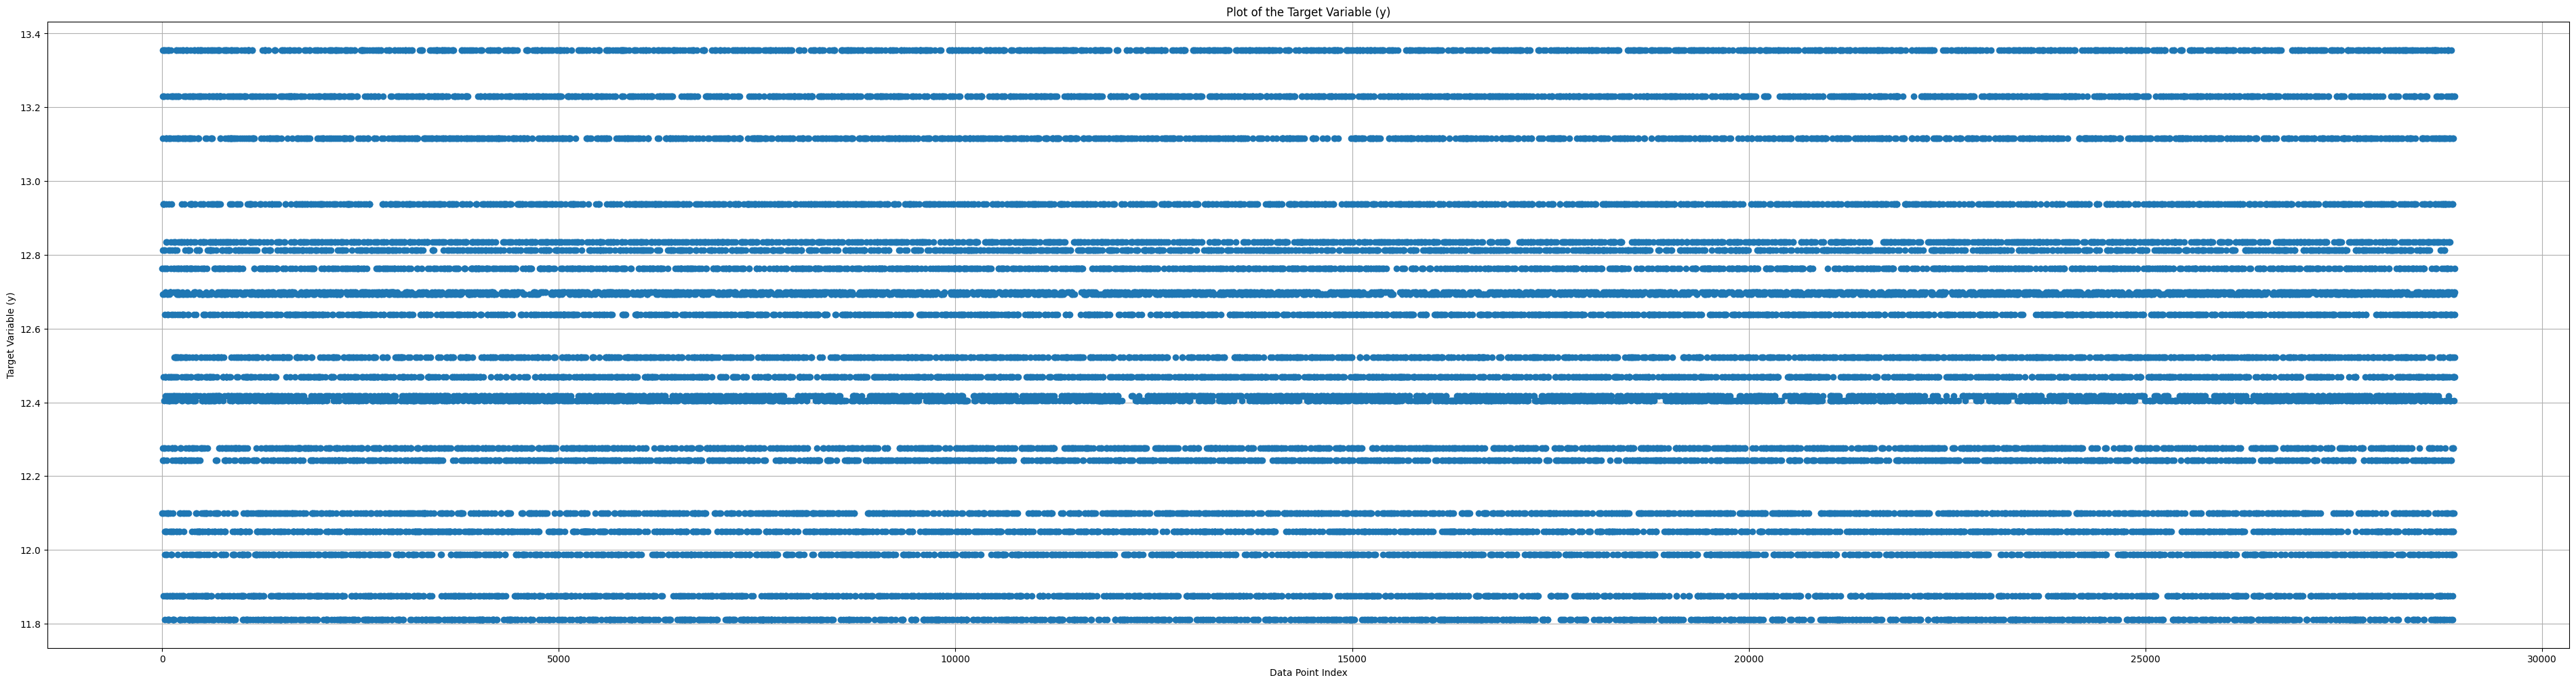

In [102]:
x = np.arange(len(y_pred))

# Plot the target variable y
plt.figure(figsize=(48, 12))
plt.plot(x, y_pred, marker='o', linestyle="")
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable (y)')
plt.title('Plot of the Target Variable (y)')
plt.grid(True)
plt.show()

## 03 - Hyperparameter Tuning

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

overview
- epsilon 
- kernel type: linear, polynomial, RBF
- C: regularization parameter (correctly separate as many instances as possible rather than creating a hyperplane with the largest minimum margin)
- gamma (only for rbf): curvature in a decision boundary

add cross validation

In [ ]:
svr_cv = SVR(kernel='linear')
svr_cv.fit(X_train, y_train)

scaling target variable 

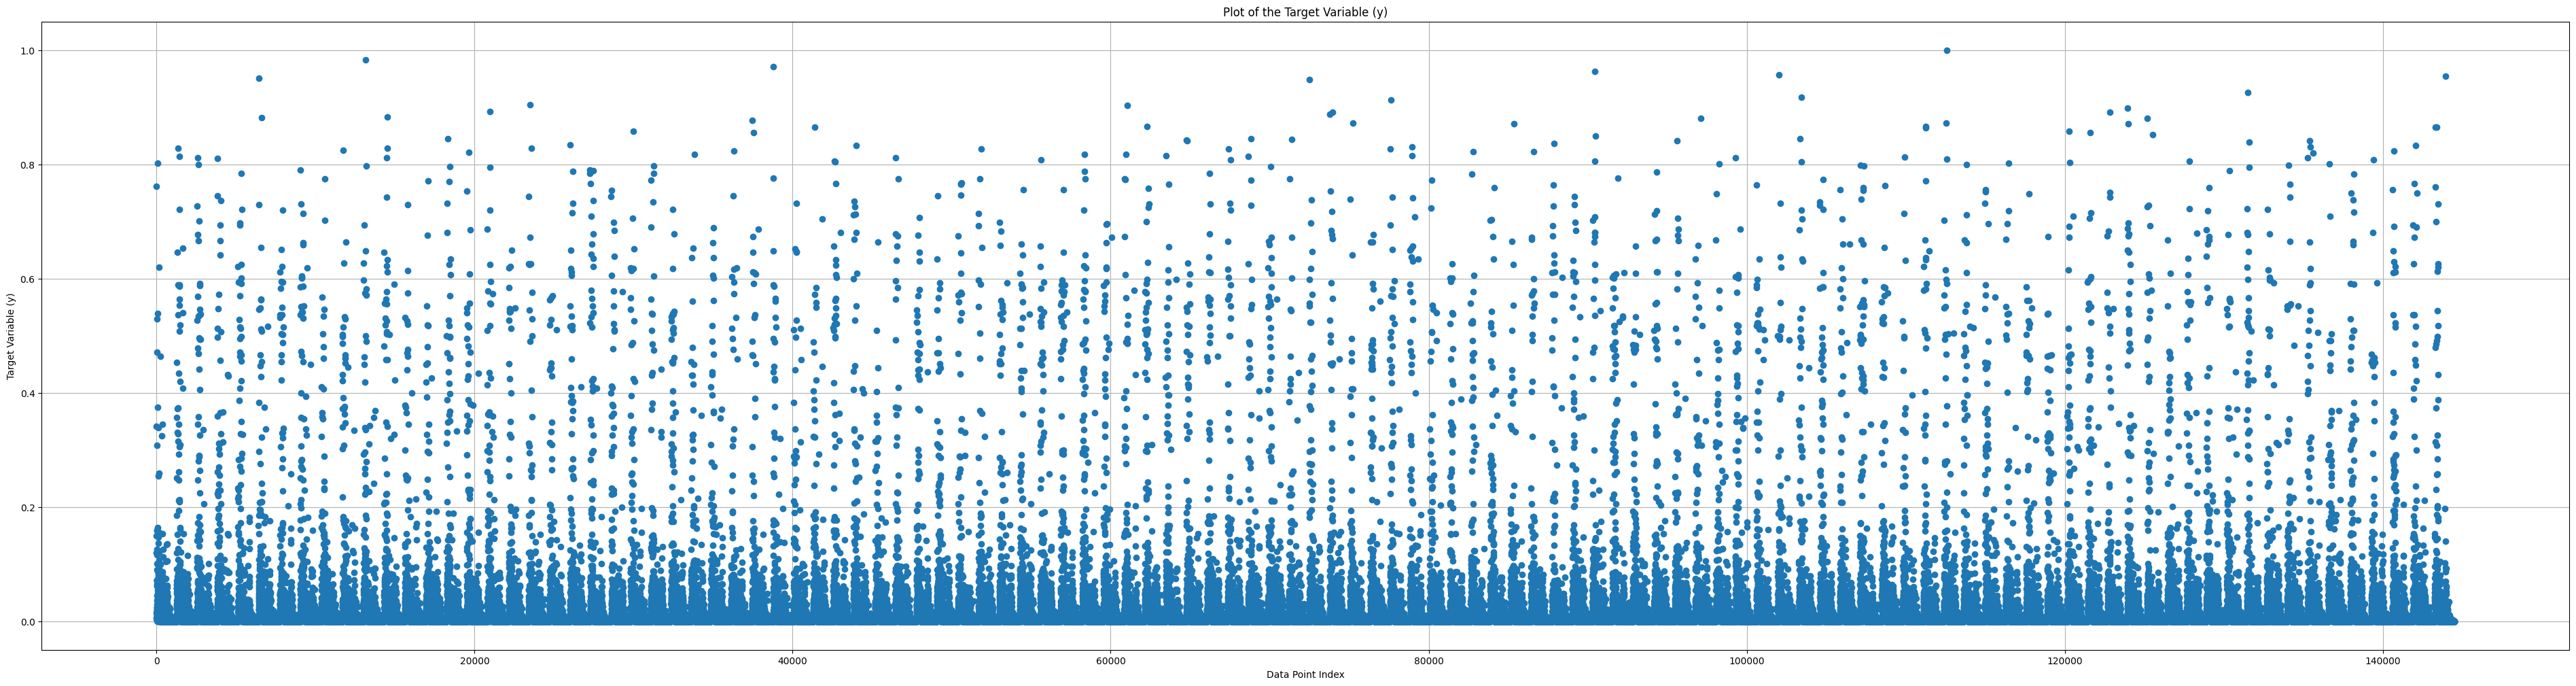

In [44]:
import matplotlib.pyplot as plt

x = np.arange(len(y))

# Plot the target variable y
plt.figure(figsize=(48, 12))
plt.plot(x, scaler(y), marker='o', linestyle="")
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable (y)')
plt.title('Plot of the Target Variable (y)')
plt.grid(True)
plt.show()

In [161]:
y[y > 2000]

4          9330
5          4182
12         3769
13         6481
31         5765
          ...  
147853     4750
147857     5297
147868     6342
148284     2421
148321    11688
Name: demand, Length: 3352, dtype: int64

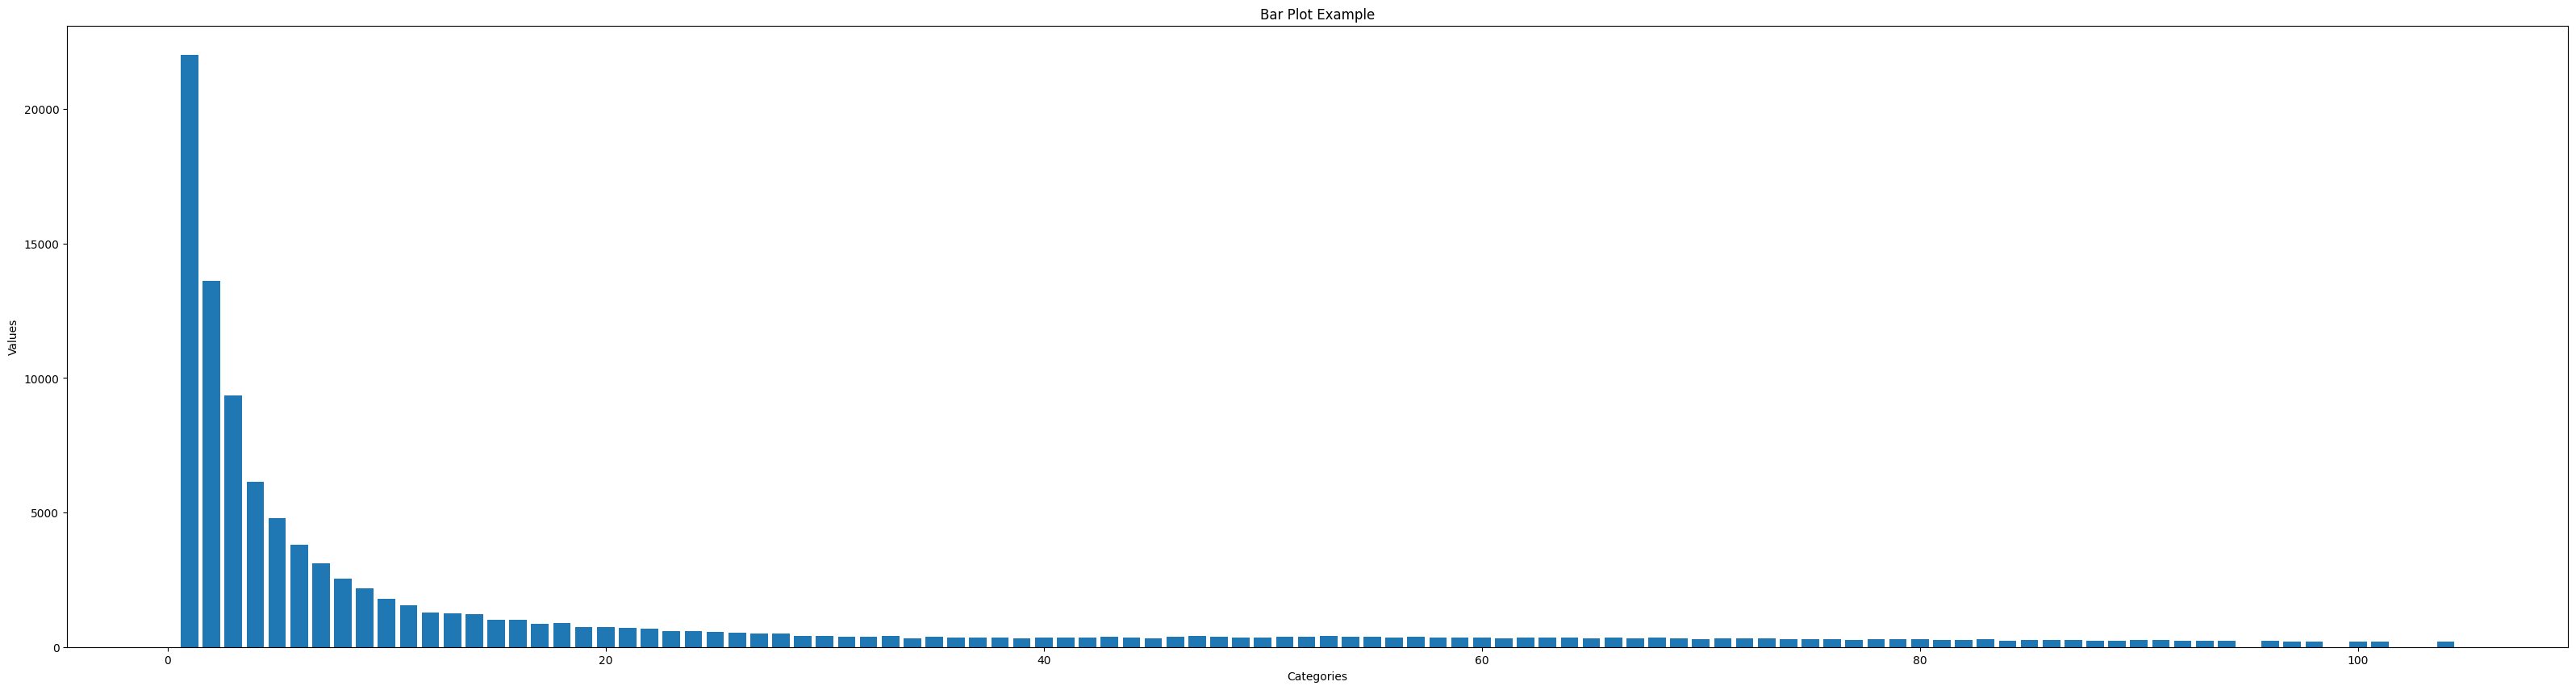

In [169]:
counts = pd.value_counts(y)

c = counts[:100]

plt.figure(figsize=(40, 10))

plt.bar(c.index, c)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot Example')

# Display the plot
plt.show()

In [46]:
from sklearn.compose import TransformedTargetRegressor

np.mean(y)

226.98153094552703

In [34]:
def scaler(y):
    return (y - 0) / (12250 - 0)  # Scale to range [0, 1]

def inverse_scaler(y_scaled):
    return y_scaled * (12250 - 0) + 0


In [35]:
regressor = SVR(kernel='linear')

transformed_regressor = TransformedTargetRegressor(regressor=regressor,
                                                  func=scaler,
                                                  inverse_func=inverse_scaler)

In [36]:
transformed_regressor.fit(X_train, y_train)


TransformedTargetRegressor(func=<function scaler at 0x000001441C2D5240>,
                           inverse_func=<function inverse_scaler at 0x000001442DBDA8C0>,
                           regressor=SVR(kernel='linear'))

In [37]:
y_scaled_pred = transformed_regressor.predict(X_test)


In [43]:
inverse_scaler(scaler(max(y)))

12250.0

In [38]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_scaled_pred)
mae = mean_absolute_error(y_test, y_scaled_pred)
r2 = r2_score(y_test, y_scaled_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1741137.6750089044
Mean Absolute Error: 1188.7194755160674
R-squared: -1.3600640474357002


add rbf kernel 

In [51]:

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=10, gamma='auto')
svr_rbf.fit(X_train, y_train)

SVR(C=10)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = svr_rbf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 783206.698784525
Mean Absolute Error: 222.65683120209764
R-squared: -0.061615056662711165


add gridsearch

In [ ]:
parameters = {
    "C": [1, 10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    }

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],            # The regularization parameter
    'gamma': ['scale', 'auto'],       # Kernel coefficient for 'rbf'
}

# Initialize the SVR model
svr_model = SVR(kernel='rbf')

# Perform grid search using cross-validation
grid_search = GridSearchCV(svr_model, param_grid, njobs=-1, cv=3, scoring='neg_mean_squared_error', verbose=2) #njobs puts one job per core
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model from grid search
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10.0, 'gamma': 'auto'}


In [18]:
grid_search.cv_results_

{'mean_fit_time': array([399.52499061, 386.91325998, 325.17817416, 316.78638101,
        381.18306341, 149.49147248]),
 'std_fit_time': array([155.61253891, 149.9413699 ,   4.60689918,   2.83315389,
        126.15885938,   4.22768193]),
 'mean_score_time': array([172.03790383, 169.07902222, 171.86694732, 169.69663706,
        151.20398116,  78.7312026 ]),
 'std_score_time': array([ 3.62004559,  4.57930818,  1.52743561,  3.10356754, 38.675201  ,
         1.26947227]),
 'param_C': masked_array(data=[0.1, 0.1, 1.0, 1.0, 10.0, 10.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'auto', 'scale', 'auto', 'scale', 'auto'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'gamma': 'scale'},
  {'C': 0.1, 'gamma': 'auto'},
  {'C': 1.0, 'gamma': 'scale'},
  {'C': 1.0, 'gamma': 'auto'},
  {'C': 10.

In [19]:
# Make predictions on the test set using the best model
y_test_pred = best_svr_model.predict(X_test)

# Evaluate the predictions using regression metrics
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 760330.097120528
Mean Absolute Error: 219.36412440908185
R-squared: -0.061170675302634425


## 04 - Evaluation 

## 05 - Spatial Model 

probleme mit spatial hexagons
- problem 1: keine one hot encoding für sv -> sparse data
- problem 2: hexagon id als categorical so nicht verwertbar
- problem 3: spatial autocorrelation ist spatial als feature aussagekräftig oder nur zur unterteilung gedacht? 

In [9]:
from h3 import h3

# return to lat long continuous variables
sdf['lat'] = sdf['pickup_hex_7'].apply(lambda x: h3.h3_to_geo(x)[0])
sdf['long'] = sdf['pickup_hex_7'].apply(lambda x: h3.h3_to_geo(x)[1])

type: invalid literal for int() with base 16: 'None'

In [219]:
sdf = sdf.drop(['start_weekday', 'start_4_hour', 'pickup_hex_7'], axis=1)

In [222]:
X = sdf.drop(['demand'], axis=1)
y = sdf['demand']

0           71
1         1833
2         1466
3          185
4         9330
          ... 
148887       1
148888       1
148889       1
148890       2
148891       1
Name: demand, Length: 144512, dtype: int64

In [223]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

# Fit the scaler on the features and transform the data
X = scaler.fit_transform(X)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle = True)

In [225]:
from sklearn.svm import SVR

# fit svr to data
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [227]:
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 777575.9411319017
Mean Absolute Error: 217.98684501295642
R-squared: -0.0461020779108301
